In [1]:
import findspark
findspark.init()

Import findspark untuk menjalankan PySpark di lingkungan Python yang tidak otomatis mendeteksi instalasi Spark.

In [2]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Cuci Piring", "Nyuci", "L"), ("Budi", 23, "MUA", "Memancing", "L"), ("Citra", 29, "Pengangguran", "Tidur", "P"), ("Dina", 45, "Pemadam Kebakaran", "Mainan Api", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+-----------------+----------+------+
| Nama|Usia|        Pekerjaan|      Hobi|Gender|
+-----+----+-----------------+----------+------+
|  Ali|  34|      Cuci Piring|     Nyuci|     L|
| Budi|  23|              MUA| Memancing|     L|
|Citra|  29|     Pengangguran|     Tidur|     P|
| Dina|  45|Pemadam Kebakaran|Mainan Api|     P|
+-----+----+-----------------+----------+------+



- SparkSession digunakan untuk memulai sesi dengan nama aplikasi "BigDataPractice". <br>
- spark.createDataFrame(data, columns) digunakan untuk membuat DataFrame PySpark dari data yang diberi. <br>
- df.show digunakan untuk menampilkan isi DataFrame di konsol dengan tampilan tabel.

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Cuci Piring", "Nyuci", "L"), ("Budi", 23, "MUA", "Memancing", "L"), ("Citra", 29, "Pengangguran", "Tidur", "P"), ("Dina", 45, "Pemadam Kebakaran", "Mainan Api", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=True)
df_sorted.show()


+-----+----+-----------------+----------+------+
| Nama|Usia|        Pekerjaan|      Hobi|Gender|
+-----+----+-----------------+----------+------+
|  Ali|  34|      Cuci Piring|     Nyuci|     L|
| Budi|  23|              MUA| Memancing|     L|
|Citra|  29|     Pengangguran|     Tidur|     P|
| Dina|  45|Pemadam Kebakaran|Mainan Api|     P|
+-----+----+-----------------+----------+------+

+----+----+-----------------+----------+------+
|Nama|Usia|        Pekerjaan|      Hobi|Gender|
+----+----+-----------------+----------+------+
| Ali|  34|      Cuci Piring|     Nyuci|     L|
|Dina|  45|Pemadam Kebakaran|Mainan Api|     P|
+----+----+-----------------+----------+------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+-----------------+----------+------+
| Nama|Usia|        Pekerjaan|      Hobi|Gender|
+-----+----+-----------------+----------+------+
| Budi|  23|              MUA| Memancing|     L|
|Citra|  29|     Pengangguran|     Tidur|     P|
|  Ali|  34|

Menggunakan data sebelumnya, melakukan operasi dasar seperti filtering, agregasi, dan pengurutan dalam PySpark. <br>

- df_filtered = df.filter(df['Usia'] > 30) hanya menampilkan usia diatas umur 30. <br>
- df.groupBy().agg(avg("Usia")).show() digunakan untuk menampilkan rata-rata nilai kolom 'Usia'. <br>
- df_sorted = df.orderBy("Usia", ascending=False) digunakan untuk menampilkan data yang telah diurutkan.

In [4]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45], "Pekerjaan": ["Cuci Piring", "MUA", "Pengangguran", "Pemadam Kebakaran"], "Hobi": ["Nyuci","Memancing","Tidur","Mainan Api"], "Gender": ["L","L","P","P"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia,Pekerjaan,Hobi,Gender
0,Ali,34,Cuci Piring,Nyuci,L
1,Budi,23,MUA,Memancing,L
2,Citra,29,Pengangguran,Tidur,P
3,Dina,45,Pemadam Kebakaran,Mainan Api,P


Menggunakan pandas sebagai library
- data_pandas = digunakan untuk mengisi data disini tabel berisi nama,usia,pekerjaan, dan hobi
- df_pandas = perintah untuk mengubah data_pandas menjadi bentuk tabel
- df_panda = untuk menmpilkan tabel yang telah berisi data.

    Nama  Usia          Pekerjaan
0    Ali    34        Cuci Piring
1   Budi    23                MUA
2  Citra    29        Pegangguran
3   Dina    45  Pemadam kebakaran
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


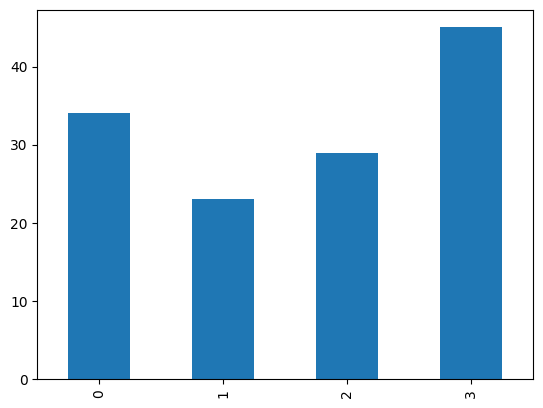

In [5]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Cuci Piring", "MUA", "Pegangguran", "Pemadam kebakaran"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()


- Df pandas <br>
- data_pandas = digunakan untuk mengisi data disini tabel berisi nama dan usia <br>
- df_pandas = perintah untuk mengubah data_pandas menjadi bentuk tabel <br>
- data_pandas_2  = Digunakan untuk mengisi data Nama dan Pekerjaan <br>
- df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama") = perintah untuk menggabungkan data panda 1 dan data panda kedua <br>
- (df_joined) = perintaah untuk menampilkan df_joined <br>
- df_pandas[Usia] . plot(kind='bar') <br>
- plt.show() = perintah untuk menampilkan matplotlip untuk menampilkan grafik yang didasarkan usia bertipe bar <br> 

In [11]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



- df_pandas_from_spark = df.toPandas() = perintah untuk mengimpor data dari pysaprk ke pandas <br>
- df_spark_from_pandas = spark.createDataFrame(df_pandas) = perintah membuat dataframe dari pyspark <br>
- df_pandas_from_spark, df_spark_from_pandas.show() = perintah untuk memnampilkan dataaprak dan pandas <br>
- df.groupBy().agg(avg("Usia")).show() = perintah untuk nebghitung rata rata berdasarkan usia dan menampilkannya <br>

In [12]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print()
print(df_pandas.describe())

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

    Nama  Usia          Pekerjaan
0    Ali    34        Cuci Piring
1   Budi    23                MUA
2  Citra    29        Pegangguran
3   Dina    45  Pemadam kebakaran

            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


- df_pandas_from_spark = df.toPandas() = perintah untuk mengimpor data dari pysaprk ke pandas <br>
- df_spark_from_pandas = spark.createDataFrame(df_pandas) = perintah membuat dataframe dari pyspark <br>
- df_pandas_from_spark, df_spark_from_pandas.show() = perintah untuk memnampilkan dataaprak dan pandas <br>
- df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama") = perintah untuk menggabungkan data panda1 dan 2 berdassarkan nama <br>
- print(df_joined) <br>
- print(df_pandas.describe()) = perintah untuk mendeskripsikan <br>